# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

## Classification CNN based on Fruits Sataset


Classification CNN based on Fruits Sataset

In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt


print("Libraries imported successfully!")



Libraries imported successfully!


## Step 1: Dataset

In [3]:
img_height, img_width= 32,32
batchSize=20
train_dataset=tf.keras.utils.image_dataset_from_directory("fruits/train",image_size=(img_height, img_width),batch_size=batchSize)
validation_dataset=tf.keras.utils.image_dataset_from_directory("fruits/validation",image_size=(img_height, img_width),batch_size=batchSize)
test_dataset=tf.keras.utils.image_dataset_from_directory("fruits/test",image_size=(img_height, img_width),batch_size=batchSize)

Found 1057 files belonging to 6 classes.
Found 175 files belonging to 6 classes.
Found 230 files belonging to 6 classes.



### Step 2: visualisation des donnée


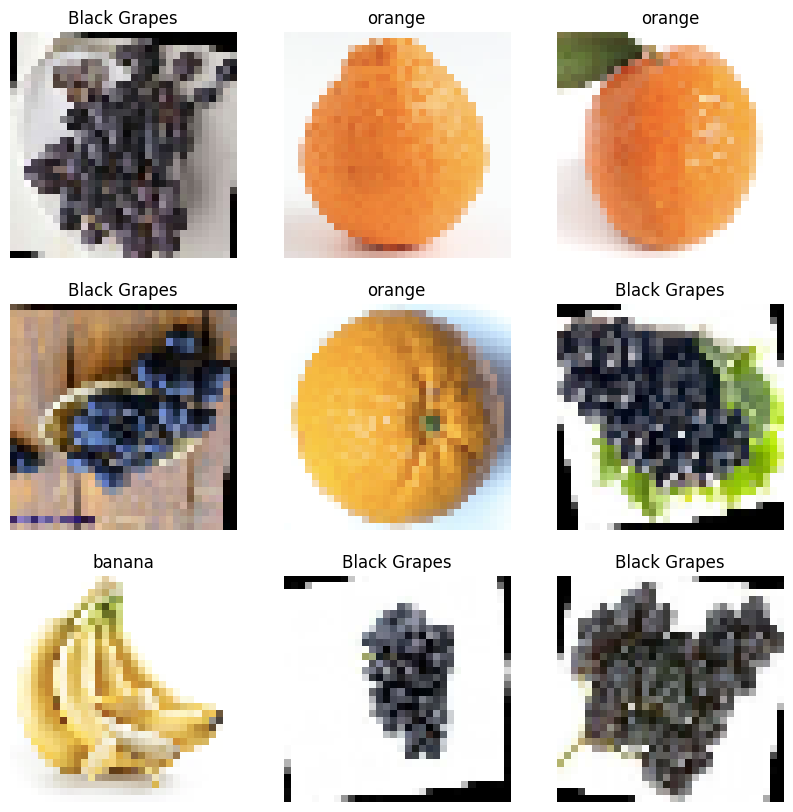

In [4]:
class_names =  ['Black Grapes', 'Green Grapes', 'apple','avocado', 'banana', 'orange']

plt.figure(figsize=(10,10)) #initialisation 10*10pouces
for img,label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis('off')
    plt.show() 

In [5]:
model =tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255), #normalisation 
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')

    ]
)

In [17]:
## Step4 : Paramétrage 

Step 4 :Paramétrages du modele

In [6]:
#optimizer : ajuste les poids

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
##loss:fct de perte = compare les predictions du modele avec les vrais etiquette des classe, proportion de prédictions correctes

Step 5 : 

In [7]:
model.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3524 - loss: 1.5888 - val_accuracy: 0.3886 - val_loss: 1.1816
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6950 - loss: 0.8097 - val_accuracy: 0.6857 - val_loss: 0.7640
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7921 - loss: 0.5557 - val_accuracy: 0.8171 - val_loss: 0.5470
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8349 - loss: 0.4771 - val_accuracy: 0.7829 - val_loss: 0.5676
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8216 - loss: 0.4621 - val_accuracy: 0.8514 - val_loss: 0.4537
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8609 - loss: 0.3936 - val_accuracy: 0.6400 - val_loss: 0.8461
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8622 - loss: 0.3862 - val_accuracy: 0.8114 - val_loss: 0.5519
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9116 - loss: 0.2847 - val_accuracy: 0.8914 - v

In [29]:
model.evaluate(test_dataset,verbose=2)

12/12 - 0s - 15ms/step - accuracy: 0.7739 - loss: 0.5668


[0.5667562484741211, 0.7739130258560181]

In [23]:
model.save('CNN_fruits.h5')